In [1]:
%matplotlib inline

In [2]:
run rotatingAntennaWedge_1days_217ant_diffDirection_small_fewChan_jit.py

0.048252
day=0
day=1
day=2
day=3
day=4
day=5
day=6
day=7
day=8
day=9
day=10
day=11
day=12
day=13
day=14
day=15
day=16
day=17
day=18
day=19
day=20
day=21
day=22
day=23
day=24
day=25
day=26
day=27
day=28
day=29
day=30
day=31
day=32
day=33
day=34
day=35
day=36
day=37
day=38
day=39
day=40
day=41
day=42
day=43
day=44
day=45
day=46
day=47
day=48
day=49
day=50
day=51
day=52
day=53
day=54
day=55
day=56
day=57
day=58
day=59
day=60
day=61
day=62
day=63
day=64
day=65
day=66
day=67
day=68
day=69
day=70
day=71
day=72
day=73
day=74
day=75
day=76
day=77
day=78
day=79
day=80
day=81
day=82
day=83
day=84
day=85
day=86
day=87
day=88
day=89
day=90
day=91
day=92
day=93
day=94
day=95
day=96
day=97
day=98
day=99


rotatingAntennaWedge_1days_217ant_diffDirection_small_fewChan_jit.py:213: RuntimeWarning: invalid value encountered in divide
  uvCubeDelayTransform=fft.fftshift(fft.fft(fft.fftshift(uvCube/sampleCube*windowCube,axes=[2]),axis=2),axes=[2])
rotatingAntennaWedge_1days_217ant_diffDirection_small_fewChan_jit.py:139: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  counts[binNum]+=1
rotatingAntennaWedge_1days_217ant_diffDirection_small_fewChan_jit.py:140: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dGrid[:,binNum]+=dataCube[uNum,vNum,dataCube.shape[-1]/2:]
rotatingAntennaWedge_1days_217ant_diffDirection_small_fewChan_jit.py:141: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dGrid[:,binNum]+=np.flipud(dataCube[uNum,vNum,:dataCube.shape[-1]/2])


/Users/aaronew/Python/analysis/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide


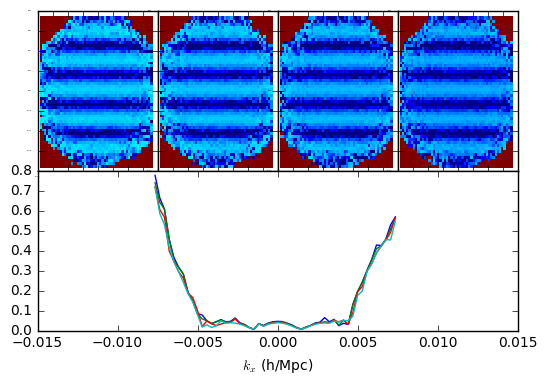

In [4]:
nf=len(fAxis)
uA=np.arange(-gridSize/2,gridSize/2)*dGrid
kA=cosmology.u2kperp(uA,cosmology.f2z(f0))
kxGrid,kyGrid=np.meshgrid(kA,kA)
plt.close()
fig=plt.figure()
axarr=[fig.add_axes([.1,.5,.2,.4]),
        fig.add_axes([.3,.5,.2,.4]),
        fig.add_axes([.5,.5,.2,.4]),
        fig.add_axes([.7,.5,.2,.4])]
laxis=fig.add_axes([.1,.1,.8,.4])



for sliceNum in range(4):
    sliceIndex=(sliceNum*nf)/4
    testSliceL=np.log10(np.abs(np.real(uvCube[:,:,sliceIndex+2]/sampleCube[:,:,sliceIndex+2])))
    testSliceL[np.logical_or(np.isnan(testSliceL),np.isinf(testSliceL))]=0.
    axarr[sliceNum].pcolor(kxGrid,kyGrid,testSliceL,vmin=-2,vmax=0)
    axarr[sliceNum].tick_params('x',labelsize=0)
    axarr[sliceNum].tick_params('y',labelsize=0)


    avgBox=(np.mean(10**testSliceL[:,np.logical_and(kA>-.01,kA<=.01)],axis=1))
    laxis.plot(kA,avgBox)
laxis.set_xlim(-0.015,0.015)
laxis.set_xlabel('$k_x$ (h/Mpc)')
#laxis.set_ylim(0,.01)
